In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [9]:
data = pd.read_csv('telecom.csv')

In [10]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [11]:
data.drop(['State', 'Voice mail plan'], axis=1, inplace=True);

In [12]:
data['International plan'] = data['International plan'].map({'Yes': 1, 'No': 0})

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Number vmail messages   3333 non-null   int64  
 4   Total day minutes       3333 non-null   float64
 5   Total day calls         3333 non-null   int64  
 6   Total day charge        3333 non-null   float64
 7   Total eve minutes       3333 non-null   float64
 8   Total eve calls         3333 non-null   int64  
 9   Total eve charge        3333 non-null   float64
 10  Total night minutes     3333 non-null   float64
 11  Total night calls       3333 non-null   int64  
 12  Total night charge      3333 non-null   float64
 13  Total intl minutes      3333 non-null   float64
 14  Total intl calls        3333 non-null   

In [13]:
y = data["Churn"].astype('int')

In [14]:
X = data.drop("Churn", axis=1)

In [11]:
X.shape, y.shape

((3333, 17), (3333,))

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [15]:
X_train.shape, X_test.shape

((2333, 17), (1000, 17))

In [16]:
first_tree = DecisionTreeClassifier(random_state=17)

In [18]:
cross_val_score(first_tree, X_train, y_train, cv=5)

array([0.9143469 , 0.91220557, 0.92077088, 0.90772532, 0.91416309])

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
first_KNN = KNeighborsClassifier()

In [21]:
cross_val_score(first_KNN, X_train, y_train, cv=5)

array([0.8608137 , 0.85653105, 0.875803  , 0.86266094, 0.87982833])

In [22]:
from sklearn.model_selection import GridSearchCV

In [31]:
tree_params = {"max_depth": np.arange(1, 11), "max_features": [0.5, 0.7, 1]}

In [32]:
tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1)

In [1]:
%%time
tree_grid.fit(X_train, y_train)

NameError: name 'tree_grid' is not defined

In [35]:
tree_grid.best_score_, tree_grid.best_params_

(0.9391366681677404, {'max_depth': 6, 'max_features': 0.7})

## Теперь потестим с помощью KNN

In [36]:
knn_params = {"n_neighbors": range(5, 30, 5)}  # + list(range(50, 100, 10))}

In [38]:
knn_grid = GridSearchCV(first_KNN, knn_params, cv=5)

In [39]:
%%time
knn_grid.fit(X_train, y_train);

Wall time: 1.36 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(5, 30, 5)})

In [40]:
knn_grid.best_score_, knn_grid.best_params_

(0.8701289391697531, {'n_neighbors': 10})

## Сделаем предсказания

In [42]:
tree_valid_pred = tree_grid.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test, tree_valid_pred)

0.936

In [45]:
from sklearn.tree import export_graphviz

In [47]:
second_tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
second_tree.score(X_test, y_test)

0.905

In [48]:
export_graphviz(
    second_tree, out_file="telecom_tree2.dot", feature_names=X.columns, filled=True,
)

In [51]:
!ls -l *.png

"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [52]:
!dot -Tpng telecom_tree2.dot -o telecom_tree2.png

"dot" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


<img src='telecom_tree2.png'>

In [38]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=11).fit(X_train, y_train)

In [15]:
# evaluate the model 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [17]:
# report model performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.953 (0.010)


In [42]:
model.score(X_test, y_test)

0.952

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_test, model.predict(X_test))

array([[862,   5],
       [ 43,  90]], dtype=int64)

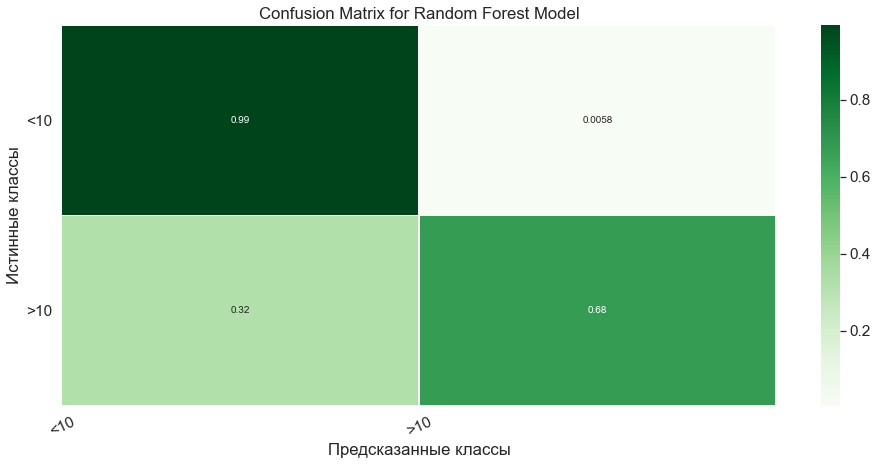

In [45]:
# так же матрица в процентах и более изящном виде
matrix = confusion_matrix(y_test, model.predict(X_test))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['No churn', 'churn']               
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [46]:
# Еще базовые метрики оценки точности модели
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       867
           1       0.95      0.68      0.79       133

    accuracy                           0.95      1000
   macro avg       0.95      0.84      0.88      1000
weighted avg       0.95      0.95      0.95      1000

